In [1]:
import torch
import networkx as nx
import torch_geometric as pyg
from torch_geometric.datasets import KarateClub
from torch_geometric.utils import to_networkx

/home/diego/miniconda3/envs/ter_gnn/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
torch.cuda.is_available()

True

In [3]:
dataset = KarateClub()

In [4]:
data_dict = dict((name, data) for name, data in dataset.data())

In [5]:
data_dict

{'x': tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]),
 'edge_index': tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
           3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
           7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
          13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
          21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
          27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
          31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
          33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
    

In [6]:
def edges_as_tuples(data):
    edges = []
    for v1, v2 in data.t().tolist():
        if (v2, v1) not in edges:
            edges.append((v1, v2))
    return edges

In [7]:
graph = nx.Graph()

In [8]:
for node, label in enumerate(data_dict['y']):
    graph.add_node(node, label=label.item())

In [9]:
graph.add_edges_from(edges_as_tuples(data_dict['edge_index']))

In [10]:
labels = nx.get_node_attributes(graph, 'label') 

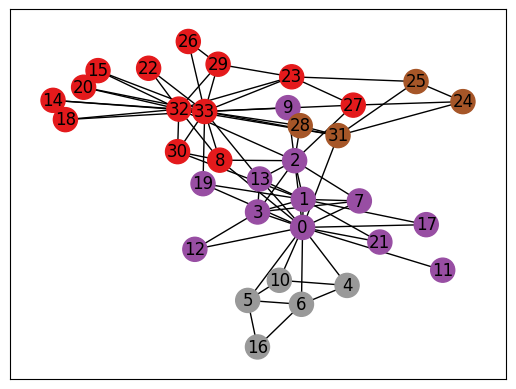

In [12]:
# Plot the graph
colors = [graph.nodes[node]['label'] for node in list(graph.nodes())]
nx.draw_networkx(graph, node_color=colors, cmap='Set1')